# Importing important libraries

In [1]:
from flask import Flask, render_template, request
import joblib
import numpy as np;
import pandas as pd;
import seaborn as sea;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import OneHotEncoder,LabelEncoder;
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor;
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score;


# Defining the dataset 

In [2]:
dataset = pd.read_csv("iris.csv");
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Defining Feature x and Target y 

In [3]:
x = dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
yl = dataset['species']
y= yl.map({'Iris-setosa': 0 , 'Iris-versicolor': 1 , 'Iris-virginica' : 2})


In [4]:
x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [5]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

# Visualizing the dataset

<Axes: xlabel='petal_length', ylabel='count'>

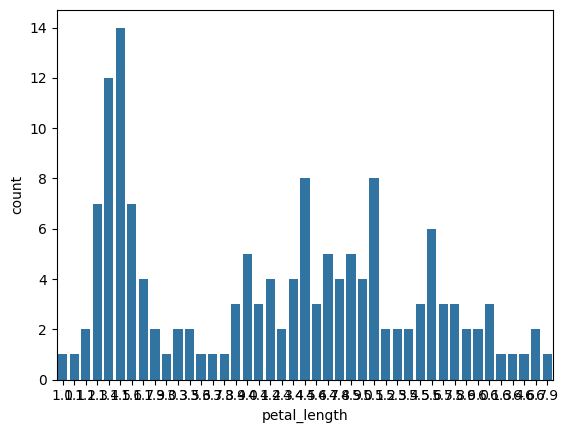

In [6]:
sea.countplot(x = 'petal_length', data=dataset)

<Axes: xlabel='petal_width', ylabel='count'>

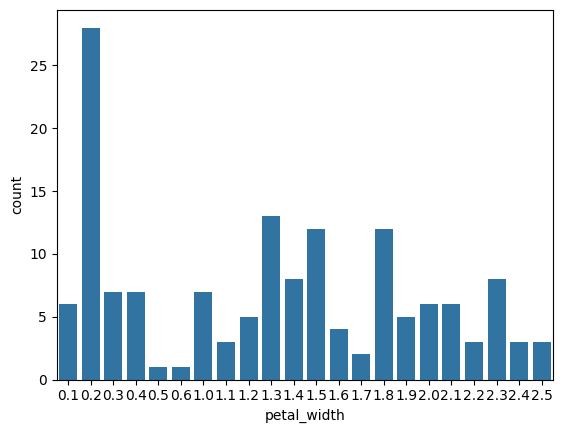

In [7]:
sea.countplot(x = 'petal_width', data=dataset)

<Axes: xlabel='sepal_width', ylabel='count'>

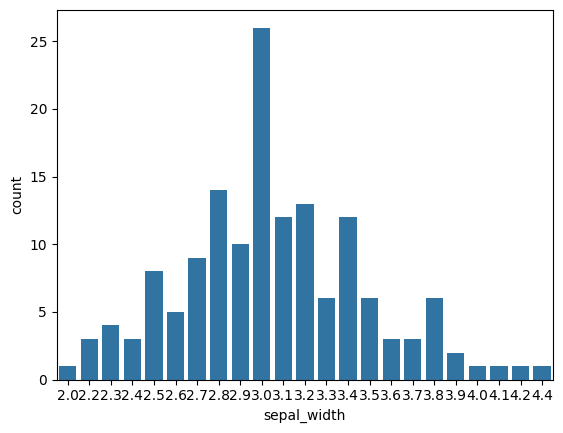

In [8]:
sea.countplot(x = 'sepal_width', data=dataset)

<Axes: xlabel='sepal_length', ylabel='count'>

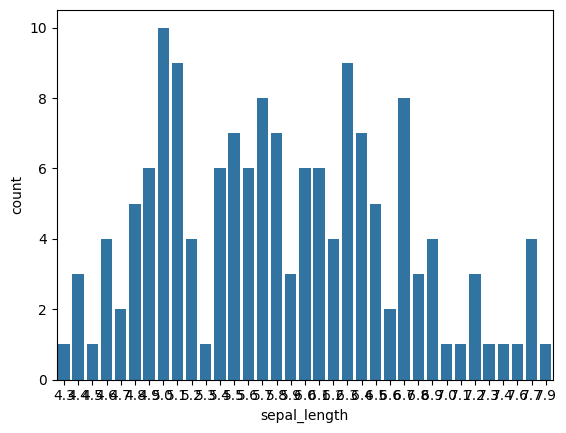

In [9]:
sea.countplot(x = 'sepal_length', data=dataset)

<Axes: xlabel='species', ylabel='count'>

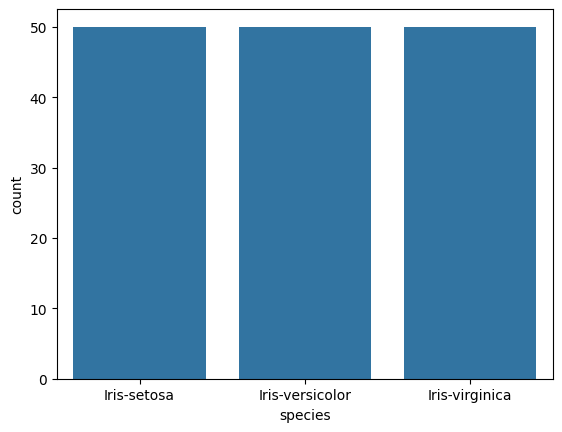

In [10]:
sea.countplot(x = 'species', data=dataset)

# Splitting the dataset 

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Applying Decision Tree Classifier and also checking its accuracy

In [12]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

# Now check the model by cross-validation in 5 folds

In [13]:
scores = cross_val_score(clf, x, y, cv=5) 
scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [14]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred ))
print(confusion_matrix(y_test, y_pred ))

Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [15]:
joblib.dump(clf, 'iris detection.pkl')

['iris detection.pkl']